# 1. MINST Dataset

### 1.1  Use Keras to load MINST Dataset


**tf.kera.datasets.mnist.load_data(path=‘mnist.npz’)**

**Arguments:**

- **path:** local path to save the dataset（~/.keras/datasets）

**Returns：**

```
Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
```

#### check [mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) API 

In [2]:
""" Deprecated Methods """
"""
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./mnist/dataset/')

"""
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist.npz')

Using TensorFlow backend.


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


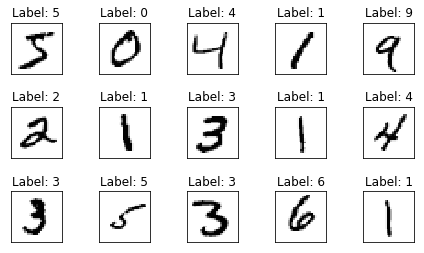

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
# plot the first 15 pictures
for i in range(15):
    plt.subplot(3,5,i+1) 
    plt.tight_layout() # auto layout
    plt.imshow(x_train[i], cmap='Greys') # gray
    plt.title("Label: {}".format(y_train[i])) # subtitle as label
    plt.xticks([]) # delete x label
    plt.yticks([]) # delete y label

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### 1.2 Data Normalization

In [6]:
# faltten[28,28] to [784,]
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))

(60000, 784) <class 'numpy.ndarray'>
(10000, 784) <class 'numpy.ndarray'>


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalization
X_train /= 255
X_test /= 255

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# count labels
label, count = np.unique(y_train, return_counts=True)
print(label, count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


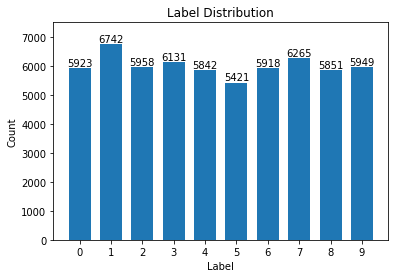

In [10]:
fig = plt.figure()
plt.bar(label, count, width = 0.7, align='center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label, count):
    plt.text(a, b, '%d' % b, ha='center', va='bottom',fontsize=10)

plt.show()

# 2. Model

### 2.1 One-hot Encoding

In [11]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test, n_classes)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [12]:
print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 2.2 Define Neural Network

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

W0727 21:57:11.750688 140530616211328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:59: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 21:57:11.765804 140530616211328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:432: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 21:57:11.780187 140530616211328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3535: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### 2.3 Compile 

In [15]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

W0727 21:57:14.924761 140530616211328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:697: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 21:57:14.954483 140530616211328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2745: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0727 21:57:14.967947 140530616211328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2749: The name tf.log is deprecated. Please use tf.math.log instead.



### 2.4 Save History and Visualize Training Metrics

In [16]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test, Y_test))

W0727 21:57:19.666369 140530616211328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2289: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0727 21:57:19.804049 140530616211328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0727 21:57:19.872736 140530616211328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:602: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
10s - loss: 0.7813 - acc: 0.7628 - val_loss: 0.3795 - val_acc: 0.8891
Epoch 2/5
9s - loss: 0.3420 - acc: 0.8996 - val_loss: 0.3093 - val_acc: 0.9069
Epoch 3/5
9s - loss: 0.2830 - acc: 0.9171 - val_loss: 0.2614 - val_acc: 0.9222
Epoch 4/5
9s - loss: 0.2390 - acc: 0.9298 - val_loss: 0.2197 - val_acc: 0.9329
Epoch 5/5
9s - loss: 0.2023 - acc: 0.9400 - val_loss: 0.1870 - val_acc: 0.9442


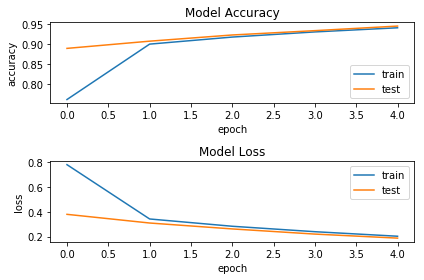

In [17]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

### 2.5 Save and Load Model

In [18]:
import os
import tensorflow.gfile as gfile

save_dir = "./mnist/model/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./mnist/model/keras_mnist.h5 


In [0]:
# load model from storage
from keras.models import load_model

mnist_model = load_model(model_path)

### 2.6 Run on Test Dataset

In [20]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.18702191615104674
Test Accuracy: 94.42%
 9632/10000 [===========================>..] - ETA: 0sClassified correctly count: 9442
Classified incorrectly count: 558
